In [23]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


In [24]:
def read_corpus_to_dataframe(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                token, label = parts
                data.append({'token': token, 'label': label})
                
    return pd.DataFrame(data)


In [25]:
df_train = read_corpus_to_dataframe('./data/es-en/train.conll')
df_dev = read_corpus_to_dataframe('./data/es-en/dev.conll')
df_train[:20]

,token,label
0,11:11,other
1,.....,other
2,make,lang1
3,a,lang1
4,wish,lang1
5,.......,other
6,night,lang1
7,night,lang1
8,@YiseBabee,other
9,i,lang1


In [26]:
df_train['label'].value_counts()

label
lang2        112988
lang1         80437
other         54060
ne             5187
ambiguous       266
unk             218
mixed            42
fw               23
Name: count, dtype: int64

In [27]:
print(df_train.size)
print(df_dev.size)
print(df_dev.size / (df_train.size + df_dev.size) * 100)

506442
80782
13.7565903300955


In [28]:
X_train, y_train = df_train['token'], df_train['label']
X_dev, y_dev = df_dev['token'], df_dev['label']

# vectorization + classfieur svm
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, max_df=0.5, ngram_range=(1,3))),
    ('svm', SVC(kernel='linear'))
])

# row counts of each : 202574 rows for each x y train, 50645 rows for each x y test
print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(253221,)
(253221,)
(40391,)
(40391,)


In [29]:
# Step 4: Model training
start_time = time.time()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 3))),
                ('svm', SVC(kernel='linear'))])

In [31]:
# Step 5: Model evaluation
predictions = pipeline.predict(X_dev)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training and evaluation took {elapsed_time:.2f} seconds.")
print(classification_report(y_dev, predictions))
print("Accuracy:", accuracy_score(y_dev, predictions))

Training and evaluation took 1430.73 seconds.


/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   ambiguous       0.00      0.00      0.00        39
          fw       0.00      0.00      0.00         2
       lang1       0.98      0.83      0.90     16712
       lang2       0.96      0.85      0.91     14955
       mixed       0.00      0.00      0.00         6
          ne       0.87      0.52      0.65       815
       other       0.63      1.00      0.77      7830
         unk       0.00      0.00      0.00        32

    accuracy                           0.87     40391
   macro avg       0.43      0.40      0.40     40391
weighted avg       0.90      0.87      0.87     40391

Accuracy: 0.8652670149290683


/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


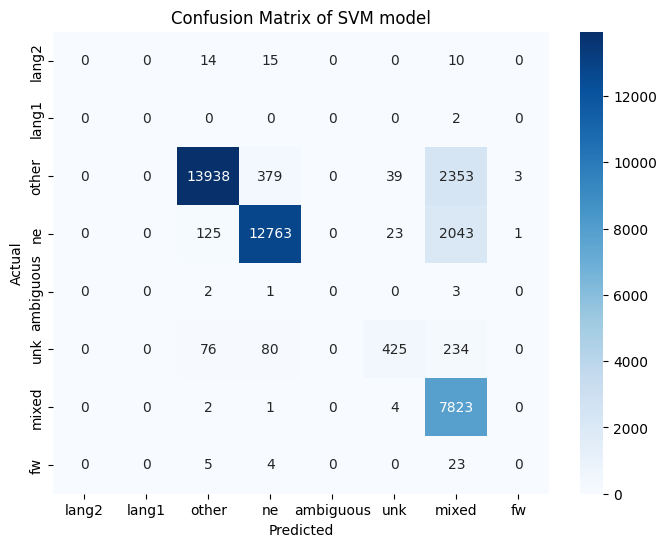

In [36]:
cm = confusion_matrix(y_dev, predictions)
label_counts = y_train.value_counts().index
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_counts, yticklabels=label_counts)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of SVM model')
plt.show()